In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [35]:
# Importamos Librerias
import pandas as pd
import xlrd
import matplotlib.pyplot as plt 

In [3]:
# Creamos el dataframe a partir del csv e indicamos que la primer columna es el indice
df_precios = pd.read_csv("Matriz_precios_back.csv",index_col=[0])
df_precios.head()




,ACEITE DE DENDE CEPERA X 100 ML.,ACEITE DE GIRASOL ALSAMAR PC X 1.5 LT.,ACEITE DE GIRASOL CAÑUELAS PC X 1.5 LT.,ACEITE DE GIRASOL CAÑUELAS PC X 900 ML.,ACEITE DE GIRASOL COCINERO PC X 1.5 LT.,ACEITE DE GIRASOL COCINERO PC X 900 CC.,ACEITE DE GIRASOL FAMILIAR X 1.5 LT.,ACEITE DE GIRASOL GOLDEN CHEF X 900 ML.,"ACEITE DE GIRASOL LEGITIMO X 1,5 LT.",ACEITE DE GIRASOL LEGITIMO X 900 ML.,...,TAPAS PARA PASCUALINAS IL BAMBINO X 2 UND X 400 GR,TAPAS PARA PASTELITOS IL BAMBINO X 12 UN X 400 GR,TOALLAS HUMEDAS HUGGIES 4 EN 1 X 48 UN.,TOALLAS HUMEDAS HUGGIES OLEO X 48 UN.,TOALLAS HUMEDAS HUGGIES PURO Y NATURAL X 48 UN.,YOGUR SANCOR VIDA BEBIBLE DESCREMADO FRUTILLA BOT,bid_x,ask_x,bid_y,ask_y
2022-04-11,612.56,339.0,345.0,239.0,307.0,195.0,785.2,269.36,390.0,234.0,...,126.36,128.22,525.0,599.0,685.0,92.56,191.4,195.0,111.75,117.75
2022-04-12,612.56,339.0,345.0,239.0,307.0,195.0,785.2,269.36,390.0,234.0,...,126.36,128.22,525.0,599.0,685.0,92.56,191.4,195.0,111.75,117.75
2022-04-13,612.56,339.0,345.0,239.0,307.0,195.0,785.2,269.36,390.0,234.0,...,126.36,128.22,525.0,599.0,685.0,92.56,191.4,195.0,112.00,118.00
2022-04-18,612.56,339.0,345.0,239.0,307.0,195.0,785.2,269.36,390.0,234.0,...,126.36,128.22,525.0,599.0,685.0,92.56,191.4,195.0,112.50,118.50
2022-04-19,612.56,339.0,345.0,239.0,307.0,195.0,785.2,269.36,390.0,234.0,...,126.36,128.22,525.0,599.0,685.0,92.56,194.4,198.0,112.75,118.75


In [4]:
# Creamos un segundo dataframe a partir del archivo xlsx que tenemos

df_dolar_blue = pd.read_excel("blue_2022.xlsx",index_col=[0])

In [5]:
df_dolar_blue.head()

,bid,ask
fecha,,
2022-01-03,$ 102.00,$ 108.00
2022-01-04,$ 102.00,$ 108.00
2022-01-05,$ 102.00,$ 108.00
2022-01-06,$ 102.25,$ 108.25
2022-01-07,$ 102.50,$ 108.50


In [6]:
# Vamos a tomar una columna como referencia para buscar con respecto a que parametro podemos agrupar 
df_precios['bid_x'].describe()

count    107.000000
mean     248.070093
std       41.301746
min      191.400000
25%      202.400000
50%      265.000000
75%      285.000000
max      330.000000
Name: bid_x, dtype: float64

In [11]:
# Creamos una nueva columna condicionada a la variacion de bid_x donde pase de una variable continua a una discreta
df_rango_precio=pd.cut(df_precios['bid_x'], bins=[190,202.4,265,285,320], labels=[ "Precio 1", "Precio 2", "Precio 3", "Precio 4"]) 



In [14]:
# Creamos un nuevo dataframe a partir de la union de una de las columnas a agrupar y la nueva columna que discretizamos
df_matriz_agrupada = pd.concat([df_rango_precio, df_precios['ACEITE DE GIRASOL COCINERO PC X 900 CC.']], axis=1)

In [16]:
# Validamos que se creo correctamente el dataframe
df_matriz_agrupada.head()

,bid_x,ACEITE DE GIRASOL COCINERO PC X 900 CC.
2022-04-11,Precio 1,195.0
2022-04-12,Precio 1,195.0
2022-04-13,Precio 1,195.0
2022-04-18,Precio 1,195.0
2022-04-19,Precio 1,195.0


In [17]:
# Evaluamos como esta conformados los datos
df_matriz_agrupada.describe()

,ACEITE DE GIRASOL COCINERO PC X 900 CC.
count,107.000000
mean,219.224299
std,14.901759
min,195.000000
25%,209.000000
50%,215.000000
75%,235.000000
max,235.000000


In [18]:
# Agrupamos los valores segun la categoria discreta que creamos
df_matriz_agrupada.groupby(['bid_x'])['ACEITE DE GIRASOL COCINERO PC X 900 CC.'].sum()

bid_x
Precio 1    5648.0
Precio 2    5729.0
Precio 3    6500.0
Precio 4    5130.0
Name: ACEITE DE GIRASOL COCINERO PC X 900 CC., dtype: float64

In [81]:
#Para este analisis particular seria mas util igualmente obtener valores como el count y el mean
df_media = df_matriz_agrupada.groupby(['bid_x'])['ACEITE DE GIRASOL COCINERO PC X 900 CC.'].mean()
df_media

bid_x
Precio 1    201.714286
Precio 2    212.185185
Precio 3    232.142857
Precio 4    233.181818
Name: ACEITE DE GIRASOL COCINERO PC X 900 CC., dtype: float64

In [82]:
#Para este analisis particular seria mas util igualmente obtener valores como el count y el mean
df_cantidad = df_matriz_agrupada.groupby(['bid_x'])['ACEITE DE GIRASOL COCINERO PC X 900 CC.'].count()
df_cantidad

bid_x
Precio 1    28
Precio 2    27
Precio 3    28
Precio 4    22
Name: ACEITE DE GIRASOL COCINERO PC X 900 CC., dtype: int64

# Analisis de la información obtenida

Para este dataset particular donde bid_x es el precio del dolar blue en un rango de tiempo y los valores de 'ACEITE DE GIRASOL COCINERO PC X 900 CC.' se corresponden al precio del producto en un supermercado dado durante ese mismo periodo, podriamos considerar que la distribución de precios del producto tiende a seguir la distribución de precios del dolar, pero durante este analisis no se considero que la cantidad de muestras en un periodo fue superior a la de otros periodos, lo cual lleva a que los cortes que se tomaron para volver discreta la variable bid_x esten sesgados y es por eso que encontramos que tenemos mas muestras de Precio 1 que de Precio 2 aunque Precio 1 estaba fuera del percentil mas bajo y por ende deberia tener menor cantidad de precios que cayeran dentro de ese valor. Existiria la posibilidad que se diera esta misma situación si la distribución de muestras fuera uniforme, pero al no ser asi no podemos concluir que el precio del producto este siguiendo el valor del dolar.
No obstante se podria en un futuro realizar un analisis limitando la cantidad de muestras o recreandolas con algun modelo.

In [25]:
# Convertimos el indice en columna de analisis y cambiamos su nombre de indice a Fecha
df_matriz_agrupada.reset_index(inplace=True)
df_matriz_agrupada.rename(columns={'index':'Fecha'}, inplace=True)



In [37]:
# Realizamos el Melt del dataframe 
df_matriz_agrupada_melt=pd.melt(df_matriz_agrupada,id_vars=["Fecha","bid_x"],value_vars="ACEITE DE GIRASOL COCINERO PC X 900 CC.")


In [40]:
df_matriz_agrupada_melt

,Fecha,bid_x,variable,value
0,2022-04-11,Precio 1,ACEITE DE GIRASOL COCINERO PC X 900 CC.,195.0
1,2022-04-12,Precio 1,ACEITE DE GIRASOL COCINERO PC X 900 CC.,195.0
2,2022-04-13,Precio 1,ACEITE DE GIRASOL COCINERO PC X 900 CC.,195.0
3,2022-04-18,Precio 1,ACEITE DE GIRASOL COCINERO PC X 900 CC.,195.0
4,2022-04-19,Precio 1,ACEITE DE GIRASOL COCINERO PC X 900 CC.,195.0
...,...,...,...,...
102,2022-09-14,Precio 3,ACEITE DE GIRASOL COCINERO PC X 900 CC.,235.0
103,2022-09-15,Precio 3,ACEITE DE GIRASOL COCINERO PC X 900 CC.,235.0
104,2022-09-15,Precio 3,ACEITE DE GIRASOL COCINERO PC X 900 CC.,235.0
105,2022-09-16,Precio 3,ACEITE DE GIRASOL COCINERO PC X 900 CC.,235.0


<BarContainer object of 107 artists>

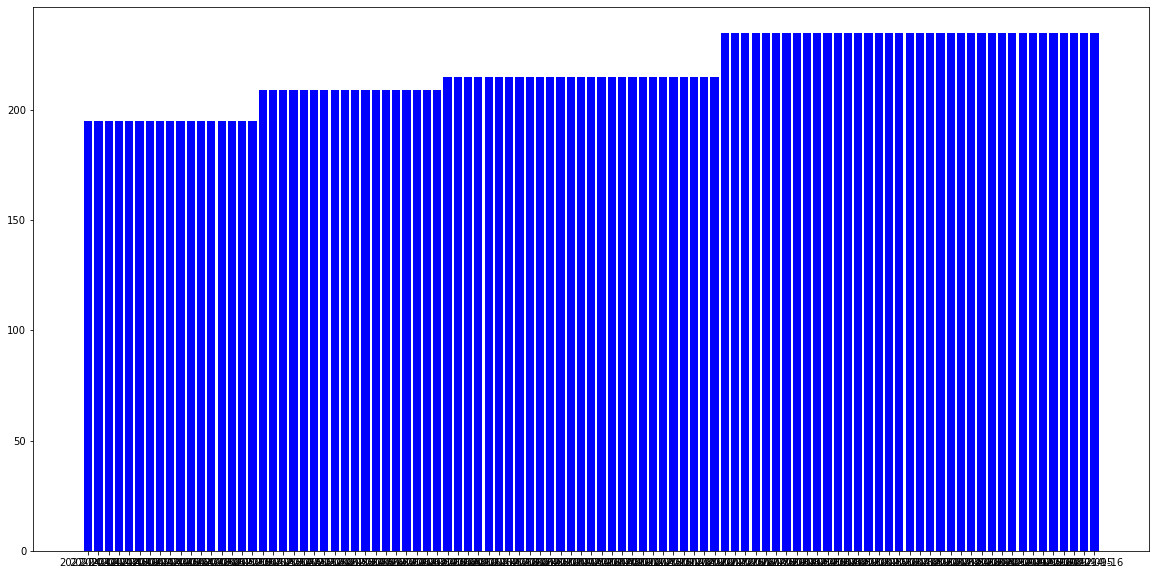

In [78]:
from matplotlib.pyplot import figure

# Realizamos la grafica de barra de el valor por fecha
plt.figure(figsize=(20,10)) 
plt.bar(df_matriz_agrupada_melt['Fecha'], df_matriz_agrupada_melt['value'], color="blue")


# No es como de ver por lo cual solo sirve para tener una idea de la tendencia

<AxesSubplot:xlabel='bid_x'>

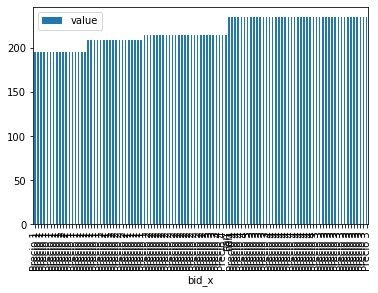

In [79]:
df_matriz_agrupada_melt.plot(x='bid_x',y='value',kind='bar')

(array([17.,  0., 18.,  0., 27.,  0.,  0., 45.]),
 array([195., 200., 205., 210., 215., 220., 225., 230., 235.]),
 <BarContainer object of 8 artists>)

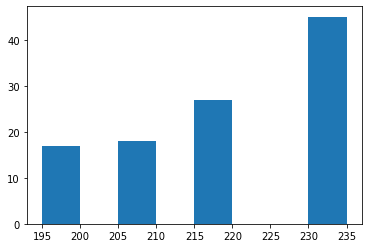

In [50]:
# Graficamos la cantidad de registros sobre cada rango de valor de producto
plt.hist(df_matriz_agrupada_melt['value'], bins=8)

bid_x
Precio 1    28
Precio 2    27
Precio 3    28
Precio 4    22
Name: ACEITE DE GIRASOL COCINERO PC X 900 CC., dtype: int64

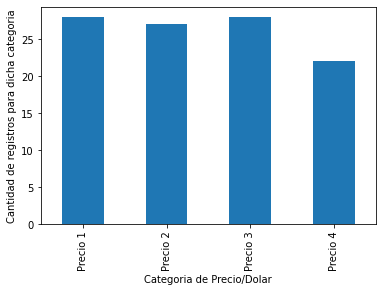

In [87]:
# Graficamos y describimos la distribución de registros segun la categoria que le asignamos
df_cantidad.plot(x='bid_x',y='value',kind='bar')
plt.xlabel("Categoria de Precio/Dolar")
plt.ylabel("Cantidad de registros para dicha categoria")
df_cantidad



bid_x
Precio 1    201.714286
Precio 2    212.185185
Precio 3    232.142857
Precio 4    233.181818
Name: ACEITE DE GIRASOL COCINERO PC X 900 CC., dtype: float64

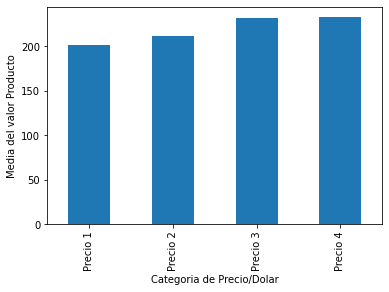

In [86]:
# Graficamos y describimos la distribución de registros segun la categoria que le asignamos
df_media.plot(x='bid_x',y='value',kind='bar')
plt.xlabel("Categoria de Precio/Dolar")
plt.ylabel("Media del valor Producto")
df_media

